## Importing Libraries


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### Read in Data

In [8]:
df = pd.read_excel('C:/Users/tkayg/Downloads/segmented_customers.xlsx')

#### Delete rows where there are empty rows

In [9]:
df = df.dropna()

#### print the first rows of the datasheet

In [10]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
#### The data shows the score spending depending on gender,age and annual income 
#### The goal is to categerize the cusotmers into clusters 
#### So let us plot the data

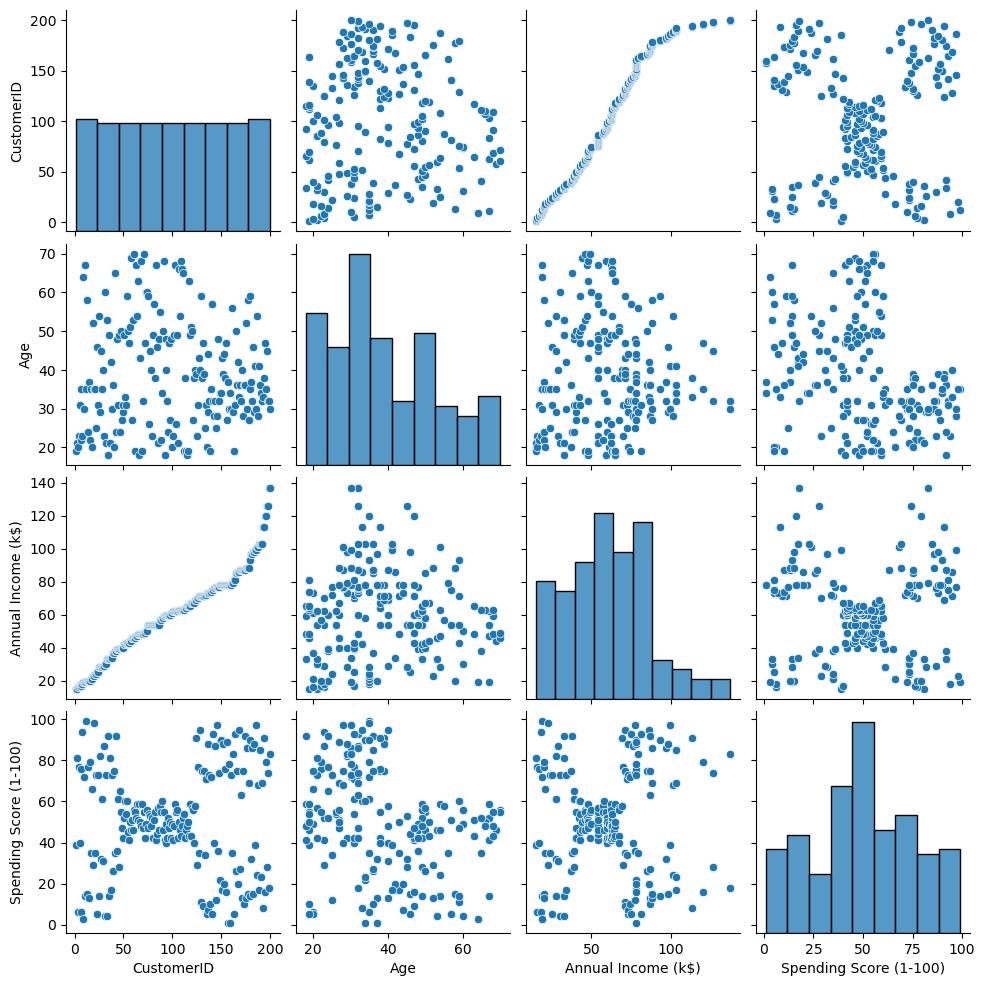

In [12]:
sns.pairplot(df)

#### I want to create clusters for the Spending Score and I pick the Age category as the input because it is not that obvious where the clusters are 

#### Lets convert the columns to numpy arrays

In [34]:
X = np.array([df['Age'],df['Spending Score (1-100)']])

#### transpose the numpy array

In [35]:
X = np.transpose(X)

In [36]:
#### We choose different values for k and calculate the error which is called intertia
#### then we plot the inertia over k 

In [37]:
intertias = []

my_k = []

for k in range(2,8): 

    clf = KMeans(n_clusters = k) 
   
    clf.fit(X)

    my_k.append(k)
    intertias.append(clf.inertia_)


Text(0.5, 1.0, 'k-means cluster')

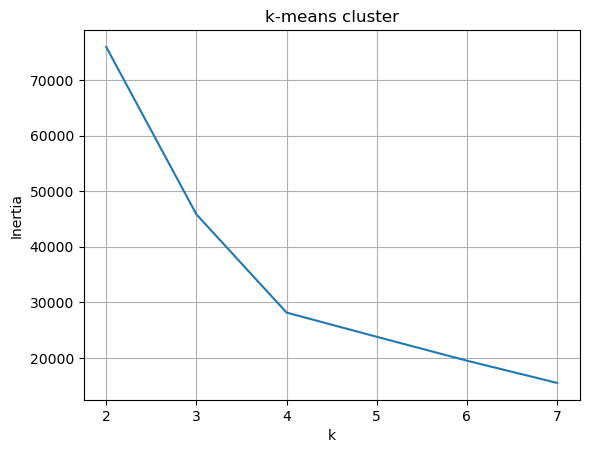

In [39]:
fig,ax = plt.subplots(1,1)

ax.plot(my_k,intertias)
ax.set_xlabel("k")
ax.set_ylabel("Inertia")
ax.grid()
ax.set_title("k-means cluster")



In [52]:
#### Elbow Method: we can see from the plot above that at k = 4 there is a biggest bend, so I will pick k = 4 

Text(0, 0.5, 'Spending Score (1-100)]')

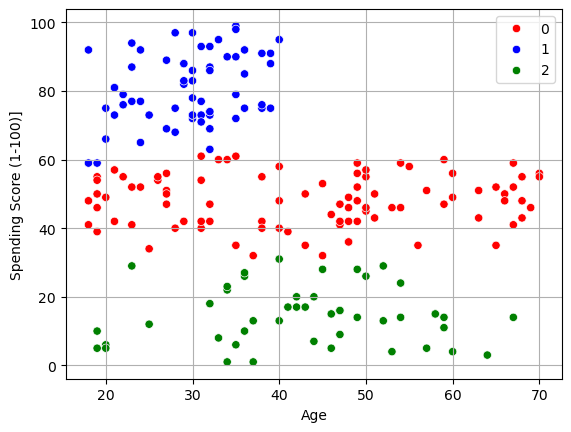

In [53]:
clf_picked =  KMeans(n_clusters = 3) 

clf_picked.fit(X)


labels1 = clf_picked.labels_



fig2,ax2 = plt.subplots()


colors = {0:'red',
          1:'blue',
          2:'green',
          3:'black'}

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels1, palette = colors )


ax2.legend()
ax2.grid()
ax2.set_xlabel("Age")
ax2.set_ylabel("Spending Score (1-100)]")